In [4]:
import glob
import csv
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [5]:
dic = {}

for files in glob.glob('C:\\Users\\madhu\\Desktop\\Repositories\\Data_Science_2019501105\\DADV\\Exam_2021_2019501105\\Month\\*.csv'):
    f=open(files, 'r')
    name = os.path.basename(f.name).replace(".csv","")
    data = pd.read_csv(f)
    close = data["gainORloss"]
    val = close[len(close) - 1] - close[1]
    dic[name] = val
    f.close()

In [6]:
len(dic)

52

In [7]:
#sorting a dictionary
sorteddic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse = True)}

In [8]:
k = 1
top_dict = {}
for each in sorteddic.keys():
    top_dict[each] = sorteddic.get(each)
    k = k+1
    if(k == 26):
        break      
dictio_keys = list(top_dict.keys())
dictio_values = list(top_dict.values())
df = pd.DataFrame()
df["Company"] = dictio_keys
df["Value"] = dictio_values 
df.to_csv("top_month.csv",index=False)
top_dict

{'ALK': nan,
 'AMD': 0.09441483100000014,
 'ABC': 0.09143275699999998,
 'AMT': 0.07025788100000008,
 'APA': 0.052771214000000066,
 'AIZ': 0.04585887099999986,
 'LNT': 0.04203117200000017,
 'ANTM': 0.03997637499999995,
 'AEP': 0.038227416000000014,
 'ADM': 0.03334383800000018,
 'GOOG': 0.032539182000000055,
 'GOOGL': 0.026854542000000148,
 'AWK': 0.02564922199999997,
 'AEE': 0.02369321000000002,
 'AIG': 0.01965751200000021,
 'AMZN': 0.013994700000000027,
 'APH': 0.0028302409999998446,
 'ACN': 0.0015863330000001064,
 'ANSS': -0.005418479999999892,
 'AMGN': -0.007348271999999989,
 'ALLE': -0.008084785000000094,
 'MO': -0.010047383999999937,
 'AAP': -0.01010781999999999,
 'APD': -0.011145809999999923,
 'MMM': -0.014378046999999672}

In [9]:
sorteddicrev = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1])}

In [10]:
k = 1
bottom_dict = {}
for each in sorteddicrev.keys():
    bottom_dict[each] = sorteddicrev.get(each)
    k = k+1
    if(k == 26):
        break
        
botmdictio_keys = list(bottom_dict.keys())
botmdictio_values = list(bottom_dict.values())
df = pd.DataFrame()
df["Company"] = botmdictio_keys
df["Value"] = botmdictio_values 
df.to_csv("bottom_month.csv",index=False)
bottom_dict

{'AAL': -0.25099182200000003,
 'ALXN': -0.15384668499999998,
 'APTV': -0.15301740399999986,
 'AMAT': -0.14363635399999986,
 'AAPL': -0.1123038209999998,
 'ALL': -0.09316692499999979,
 'ABBV': -0.091874974,
 'ABMD': -0.08630304700000013,
 'AJG': -0.08241098200000008,
 'AES': -0.08099572100000008,
 'ATVI': -0.07310994900000001,
 'ADI': -0.07168869399999989,
 'ARE': -0.07139676599999989,
 'ALGN': -0.06956563300000007,
 'ALB': -0.069177547,
 'ADBE': -0.06572510599999992,
 'AFL': -0.05956286800000021,
 'AON': -0.049881931000000046,
 'ANET': -0.04535282500000015,
 'AKAM': -0.043456012000000044,
 'AOS': -0.039092273000000066,
 'AMP': -0.03783985599999995,
 'AME': -0.031983732000000265,
 'AMCR': -0.02976413,
 'AXP': -0.022249146000000053}

In [11]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import math
from scipy import interpolate
corrlis = []
for each1 in top_dict.keys():
    for each2 in top_dict.keys():
        corr_value = np.corrcoef(top_dict.get(each1), top_dict.get(each2))[0][1]
        corrlis.append(corr_value)
        
len(corrlis)

625

In [12]:
top_data = pd.read_csv("top_month.csv")
bottom_data = pd.read_csv("bottom_month.csv")
gicssectors = pd.read_csv("GICSSector.csv")
day_topdata = pd.merge(top_data, gicssectors, on="Company")
day_bottomdata = pd.merge(bottom_data, gicssectors, on="Company")

In [13]:
day_topdata_name = list(day_topdata["GICS_Sector"])
day_bottomdata_name = list(day_bottomdata["GICS_Sector"])

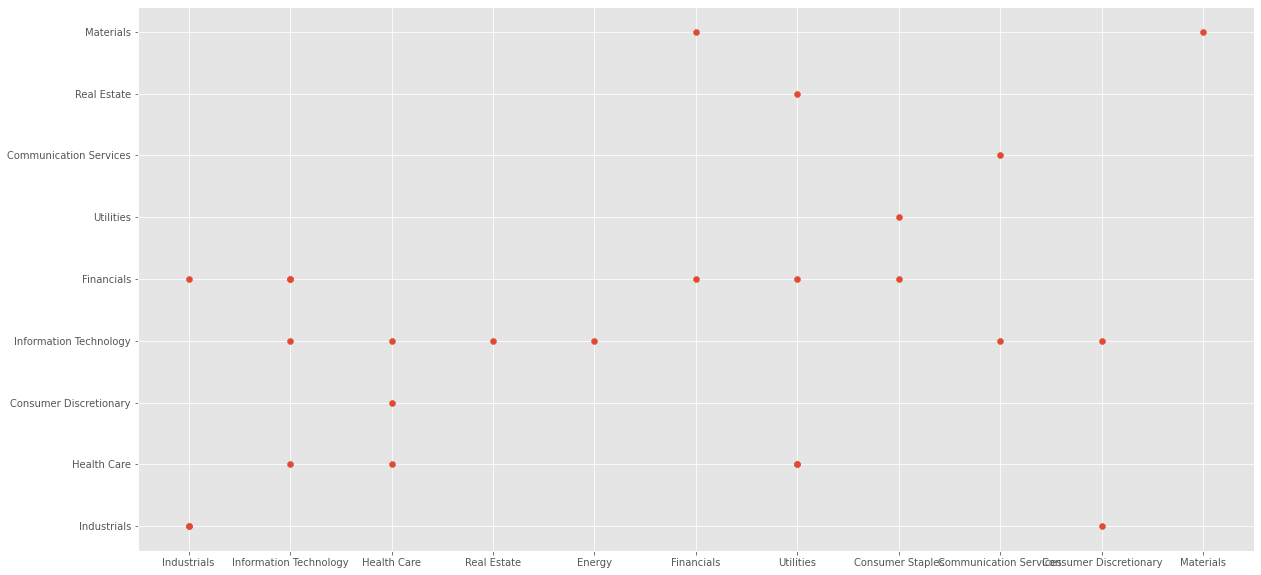

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(day_topdata_name, day_bottomdata_name)
plt.show()